In [1]:
from Controller import *
from plot import *

In [9]:
def Asum(MovementArray,DurationArray,Func,ylabel,Noise = 1e-16):
    SIZE = len(DurationArray)
    COLORLQG = "#F89D36"
    COLORILQG = "orange"
    COLORFL = "#8D99AE"
    fig,ax = plt.subplots(figsize = (10,10))

    for MovementLength in MovementArray:

        max_dev_FL = np.zeros(SIZE)
        max_dev_LQG = np.zeros(SIZE)
        max_dev_ILQG = np.zeros(SIZE)
        N = 5
        for _ in range(N):
            for idx,Duration in enumerate(DurationArray):

                XLQG,YLQG = LQG(Duration,1e6,1e6,1e6,1e6,1e-5,1e-5,targets = [0,20+MovementLength],starting_point = [0,20],plot=False,Noise_Variance=Noise)
                XFL,YFL = Feedback_Linearization(Duration,1e6,1e6,1e5,1e5,1e-5,1e-5,targets = [0,20+MovementLength],starting_point = [0,20],plot=False,Noise_Variance=Noise)
                XILQG,YILQG,_ = ILQG(Duration,1e6,1e6,1e-3,targets = [0,20+MovementLength],K = 5000,start = [0,20],plot=False)
                max_dev_FL[idx] += Func(XFL,YFL)/N
                max_dev_LQG[idx] += Func(XLQG,YLQG)/N
                max_dev_ILQG[idx] += Func(XILQG,YILQG)/N

        if MovementLength ==MovementArray[0]: 
            plt.plot(DurationArray,max_dev_FL,color = COLORFL,label = "FL Controller",alpha = .3, linestyle = "--")
            plt.plot(DurationArray,max_dev_LQG,color = COLORLQG,label = "LQG Controller")
            plt.plot(DurationArray,max_dev_ILQG,color = COLORILQG,label = "ILQG Controller")
        
        else : 
            plt.plot(DurationArray,max_dev_LQG,color = COLORLQG)
            plt.plot(DurationArray,max_dev_ILQG,color = COLORILQG)
            plt.plot(DurationArray,max_dev_FL,color = COLORFL,alpha = .3, linestyle = "--")
        ax.text(
            -0.03,
            max_dev_LQG[0],
            str(MovementLength)+" cm",
            color=COLORLQG,
            fontsize = 8,
            horizontalalignment="left",
            verticalalignment="center",
        )
        ax.text(
            2.23,
            max_dev_FL[-1],
            str(MovementLength)+" cm",
            color=COLORFL,
            fontsize = 8,
            horizontalalignment="left",
            verticalalignment="center",
            alpha = .3
        )
        ax.text(
            -0.03,
            max_dev_ILQG[-1],
            str(MovementLength)+" cm",
            color=COLORILQG,
            fontsize = 8,
            horizontalalignment="left",
            verticalalignment="center",
            alpha = .3
        )
    plt.title(ylabel + " of hand trajectories in function\n of movement time")
    plt.xlabel("Movement Time [seconds]")
    plt.ylabel(ylabel)

    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)

        # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position("left")
    ax.xaxis.set_ticks_position("bottom")


    plt.legend()

from scipy.integrate import trapezoid

def Integration(x,y):
    x = np.abs(x)
    area = trapezoid(x,y)
    area = area/(14*14)
    return area

Total cost of LQG : 3453155
Total cost of FL: 231.678
Total cost of LQG : 3885334
Total cost of FL: 77.3860
Total cost of LQG : 1836813
Total cost of FL: 69.3752
Total cost of LQG : 3734688
Total cost of FL: 18.9846
Total cost of LQG : 1882216
Total cost of FL: 233.032
Total cost of LQG : 1994808
Total cost of FL: 150.213
Total cost of LQG : 2455143
Total cost of FL: 594.646
Total cost of LQG : 1474317
Total cost of FL: 75.4578


d:\thyriona\Desktop\Codes\FL\PhD\Controller.py:491: RuntimeWarning: overflow encountered in subtract
  sbold[k] = qbold[k]+A[k].T@sbold[k+1]-G.T@Hinv@gbold


Total cost of LQG : 1044570
Total cost of FL: 78.4969
Total cost of LQG : 3997057
Total cost of FL: 39.8801
Total cost of LQG : 1663483
Total cost of FL: 428.428
Total cost of LQG : 6210671
Total cost of FL: 531.771


KeyboardInterrupt: 

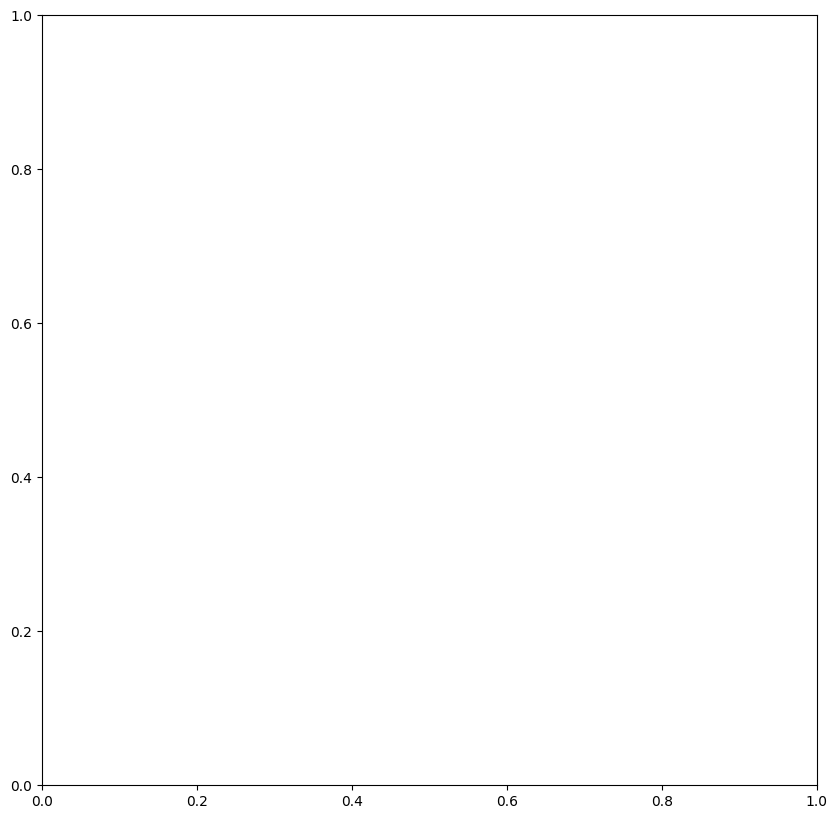

In [10]:
DurationArray = np.linspace(0.3,1.2,10)
MovementArray = [14]

Asum(MovementArray,DurationArray,Integration,"Asum",Noise = 1e-6)
plt.plot(DurationArray,np.ones(len(DurationArray))*0.02,color = "red", label = "Mean Expected Asum")
plt.legend()
plt.legend()